# Example for a simple neural network

## Trump by maximum color (2 colors)

The inputs to the network are the number of cards of each color. The network should learn to select the color with the largest number of cards of that color.

For a simple example, let us assume that there are 5 cards in total for a player and only 2 colors.

### Libraries

We use the keras library for building, training and evaluating the network. A tutorial for keras can be found on (https://keras.io/) or https://www.tensorflow.org/guide/keras. There are different implementations of keras, here I will use the one build on tensorflow.


In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

### Output function

We have to encode the output somehow, for two classes, the simplest solution is a single variable that should be 0 if there are more cards of color 0 and 1 if there are more cards of color 1.

### Training and label data.

So we can prepare some training data. In this simple case, all the possible configurations are actually known.


In [40]:
x_train = np.array([
    [0, 5],
    [1, 4],
    [2, 3],
    [3, 2],
    [4, 1],
    [5, 0],
], dtype=np.float32)
y_train = np.array([1, 1, 1, 0, 0, 0, ], dtype=np.float32)
print(x_train)
print(y_train)

[[0. 5.]
 [1. 4.]
 [2. 3.]
 [3. 2.]
 [4. 1.]
 [5. 0.]]
[1. 1. 1. 0. 0. 0.]


### Normalisation

Input data can have different ranges. It is always a good idea (in other words absolutely essential) to normalize the input data. This is usually done into the range 0..1 or -1..1

In [41]:
x_train = x_train / 5.0
print(x_train)

[[0.  1. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]


In [42]:
x_train.shape

(6, 2)

### A first network.

We will start with a very simple network, where we connect the inputs directly to the output. So there will be 2 variables, the weights for the connection and the bias. The output function is a sigmoid, which takes values between 0 and 1.

With keras, we first have to create the type of model we want (Sequential), and can then add layers. In the tensorflow implementation, we have to add the input_shape parameter in the first layer to tell it the format of the input. This does not include the batch dimension.

In [43]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation='sigmoid', input_shape=[2]))

C:\workspace\hslu\dl4g\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Next we have to compile the model and tell it what loss function and optimizer we want to have. We will take a mean squared error for loss function first. (This is actually not optimal and will be corrected in an exercise).

Besides the loss, we usually want to look at some metrics. Here we choose accuracy, that measures how often the network makes the correct decision (see last lecture).

In [44]:
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])


We can print some details about the model.

In [45]:
model.summary()
print(model.get_weights())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

[array([[ 0.69407284],
       [-0.69947046]], dtype=float32), array([0.], dtype=float32)]


We can either train one batch, or we can use fit to train repeatedly. The result from the training is the loss function and the metric.

In [46]:
model.train_on_batch(x_train, y_train)

[array(0.3650479, dtype=float32), array(0., dtype=float32)]

We can now try to fit the data in minibatches multiple times. This will calculate the weights, so as to minimize the loss. We might not always get a good result in the first try and even this very simple network seems to need a large number of training steps.

In [47]:
model.fit(x_train, y_train, epochs=100, batch_size=6)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.0000e+00 - loss: 0.3649
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 0.3647
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.3646
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 0.3644
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 0.3643
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.3641
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0000e+00 - loss: 0.3640
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.3638
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0000e+00 - loss: 0.3637
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.3635
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 0.3634
Epoch 12/100
1/1 ━━━━━━━━━━━━

We can predict the values from the training value. Why are the results floating point number and not 0 or 1? Does the result seem likely?

In [48]:
model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.35172385],
       [0.40905565],
       [0.46897224],
       [0.52979696],
       [0.58974934],
       [0.6471486 ]], dtype=float32)

We can also print the found weights for each layer:

In [49]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer.name)
    print(weights)

dense_16
[array([[ 0.6063769],
       [-0.6116225]], dtype=float32), array([0.00015208], dtype=float32)]


How do we find the actual predictions? We use a threshold on the output of the sigmoid function.

In [50]:
model.predict(x_train) > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [ True]])

### A larger network

Lets try a more complicated network with two hidden layers.

In [51]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

C:\workspace\hslu\dl4g\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


And train it again...

In [52]:
model.fit(x_train, y_train, epochs=200, batch_size=6)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - accuracy: 0.1667 - loss: 0.2647
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1667 - loss: 0.2645
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1667 - loss: 0.2643
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1667 - loss: 0.2642
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1667 - loss: 0.2640
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3333 - loss: 0.2639
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3333 - loss: 0.2637
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3333 - loss: 0.2635
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3333 - loss: 0.2634
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3333 - loss: 0.2633
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3333 - loss: 0.2633
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3333 - l

The results are not necessarly better, how does the prediction look now?

In [53]:
model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.49326113],
       [0.4945824 ],
       [0.4959038 ],
       [0.49722525],
       [0.49854672],
       [0.509542  ]], dtype=float32)

In [54]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer)
    print(weights)

<Dense name=dense_17, built=True>
[array([[ 0.26253745,  0.02333905],
       [-0.9627422 ,  0.72454154]], dtype=float32), array([-0.0641389,  0.0154676], dtype=float32)]
<Dense name=dense_18, built=True>
[array([[-0.7920411 ,  0.68574125],
       [ 0.5716519 , -0.24427614]], dtype=float32), array([-0.00868122, -0.08637725], dtype=float32)]
<Dense name=dense_19, built=True>
[array([[-0.06593588],
       [ 0.9406905 ]], dtype=float32), array([0.00036319], dtype=float32)]


The larger network, does not seem to work better as the simpler one. Or is it maybe not large enough?

The problem is not the network, but the data, we just do not have enough data. So lets try to make up some more data artificially.


In [55]:
x_new = np.random.random(size=(10000, 2))
y_new = np.zeros(10000, dtype=np.float32)
condition = (x_new[:, 1] > x_new[:, 0])
y_new[condition] = 1.0

In [56]:
model.fit(x_new, y_new, epochs=100, batch_size=100)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.4507 - loss: 0.2510
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.4526 - loss: 0.2507
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.5003 - loss: 0.2504
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.5011 - loss: 0.2501
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.5919 - loss: 0.2498
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.7228 - loss: 0.2495
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.7283 - loss: 0.2493
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.7120 - loss: 0.2490
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.7276 - loss: 0.2487
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7220 - loss: 0.2484
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.7217 - loss: 0.2480
Epoch 12/100
100/10

That seems better. Lets look how it performs on our original data.

In [57]:
model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.99982095],
       [0.99598783],
       [0.8879264 ],
       [0.15249634],
       [0.15249634],
       [0.1628557 ]], dtype=float32)

### Evaluation

We might want to check how the network performs on any data. For this, keras provides the evaluate function that will 
evaluate the loss and the metrics. So of course label (y) data is needed for that. 

In [58]:
model.evaluate(x_new, y_new)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9982 - loss: 0.0415


[0.04147570952773094, 0.998199999332428]

Of course, we would normally do that on validation or test data not used during training.

In [59]:
x_val_new = np.random.random(size=(5000, 2))
y_val_new = np.zeros(5000, dtype=np.float32)
y_val_new[x_val_new[:, 1] > x_val_new[:, 0]] = 1.0
model.evaluate(x_val_new, y_val_new)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.9986 - loss: 0.0420


[0.04198611527681351, 0.9986000061035156]

### Visualisation

It is essential to visualise the training process to see what is going on. In Keras, an easy method to do this is to use the history object that is returned from fit. It contains the metrics and the loss.

We will also split our data into training and validation for this test. We rebuild the model, so that it is initialized again. Otherwise we would just continue with the weights from the previous fit.

In [60]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_new, y_new, validation_split=0.25, epochs=50, batch_size=100)

Epoch 1/50


C:\workspace\hslu\dl4g\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4847 - loss: 0.2507 - val_accuracy: 0.4916 - val_loss: 0.2506
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 0.2505 - val_accuracy: 0.4916 - val_loss: 0.2505
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 0.2505 - val_accuracy: 0.4916 - val_loss: 0.2504
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 0.2504 - val_accuracy: 0.4916 - val_loss: 0.2504
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 0.2503 - val_accuracy: 0.4916 - val_loss: 0.2503
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 0.2503 - val_accuracy: 0.4916 - val_loss: 0.2503
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 0.2502 - val_accuracy: 0.4916 - val_loss: 0.2503
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5077 - loss: 0.2502 - val_accuracy: 0.4916 - val_loss: 0.2503
Epo

In [61]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


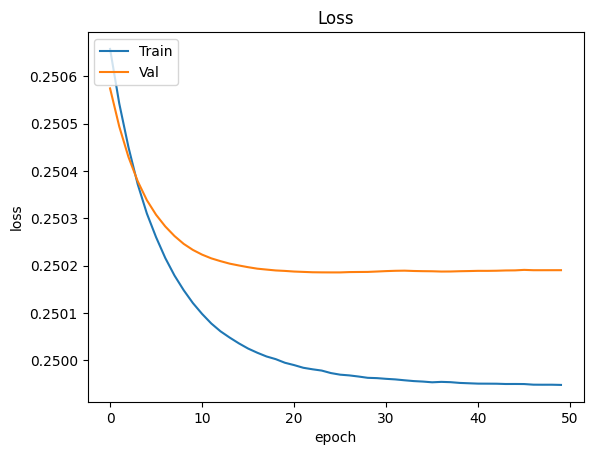

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

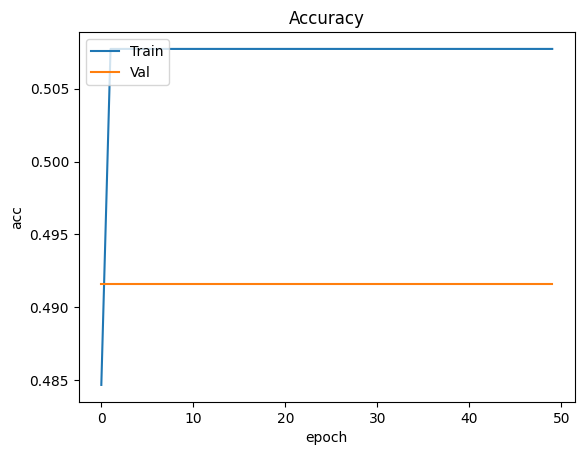

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

## Exercise: Correct loss function

The loss function used above (mse) is not optimal. A better loss function would be the crossentropy. Change the network to use that loss function.

In [64]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_new, y_new, validation_split=0.25, epochs=50, batch_size=100)

Epoch 1/50


C:\workspace\hslu\dl4g\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5188 - loss: 0.6854 - val_accuracy: 0.5204 - val_loss: 0.6849
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5607 - loss: 0.6705 - val_accuracy: 0.5764 - val_loss: 0.6730
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6215 - loss: 0.6610 - val_accuracy: 0.6236 - val_loss: 0.6641
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6533 - loss: 0.6523 - val_accuracy: 0.6500 - val_loss: 0.6559
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6723 - loss: 0.6434 - val_accuracy: 0.6704 - val_loss: 0.6474
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - loss: 0.6340 - val_accuracy: 0.6828 - val_loss: 0.6383
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7037 - loss: 0.6238 - val_accuracy: 0.6956 - val_loss: 0.6284
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7151 - loss: 0.6128 - val_accuracy: 0.7088 - val_loss: 0.6176
Epo

## Exercise: Maximum of 4 colors

Implement a network that will receive 4 colors and has to select one of them.

This will require a change of the labels (y) that now take values of 0, 1, 2 or 3. However, networks do not use labels in that form directly for multi class classification, but use 1-hot encoded or categorical data instead.

In keras there is a function `keras.utils.to_categorical` that can be used for that.

The last layer in the network should then no longer be sigmoid, but the softmax function. And we need the multiclass form of the crossentropy function, which in keras is called `categorical_crossentropy`.


In [65]:
x_train = np.random.random(size=(5000, 4))
y_train_label = np.argmax(x_train, axis=1)

y_train = keras.utils.to_categorical(y_train_label, num_classes=4)

model = keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(4, activation='sigmoid'))  # match the target variables (one neuron per category)

model.compile(loss='categorical_crossentropy',  # Multiclass classification loss
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


C:\workspace\hslu\dl4g\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4890 - loss: 1.2977
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6668 - loss: 1.0763
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7152 - loss: 0.8937  
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7750 - loss: 0.7424
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8322 - loss: 0.6128  
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8820 - loss: 0.4970  
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9186 - loss: 0.4051  
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.9360 - loss: 0.3428
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.9518 - loss: 0.2992
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.9588 - loss: 0.2697
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.9612 - loss: 0.2474
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 962

### Performance & Evaluation

In [66]:
# Testing the model with a sample input
x_test = np.random.random(size=(10, 4))
y_test_label = np.argmax(x_test, axis=1)
y_test = keras.utils.to_categorical(y_test_label, num_classes=4)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict
predictions = model.predict(x_test)
print("Predictions:", np.argmax(predictions, axis=1))
print("True Labels:", y_test_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 0.2199
Test Loss: 0.2199, Test Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predictions: [1 1 1 0 1 1 2 1 3 1]
True Labels: [1 1 1 0 1 1 2 1 3 1]


## Exercise: Implement a ML Network to learn trump from features

We would like to train a network to **get the trump** from some features. (We could use the cards directly, but this is deep learning and we will see more of that in next lesson :-) )

As features we can use the **number of cards of a color** as before and some of the features from last lecture. For keras all input features should be floating point numbers. Also we need numpy arrays and not pandas. To get the array from a panda, the property `values` can be used.

In [67]:
import pandas as pd
from pathlib import Path

path_to_data = Path('../data')
# Import only a fraction of data for efficient testing
data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None, nrows=1000)
cards = [
    # Diamonds
    'DA', 'DK', 'DQ', 'DJ', 'D10', 'D9', 'D8', 'D7', 'D6',
    # Hearts
    'HA', 'HK', 'HQ', 'HJ', 'H10', 'H9', 'H8', 'H7', 'H6',
    # Spades
    'SA', 'SK', 'SQ', 'SJ', 'S10', 'S9', 'S8', 'S7', 'S6',
    # Clubs
    'CA', 'CK', 'CQ', 'CJ', 'C10', 'C9', 'C8', 'C7', 'C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user = ['user']
trump = ['trump']

feature_columns = forehand

data.columns = cards + forehand + user + trump
data.drop('user', axis='columns', inplace=True)
data.head()


,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,6
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,5
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,5
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,4


Continue as follows:
- Calculate features, 
- add them to the data set
- drop the columns not used
- convert to numpy array
- build a network and train

In [68]:
data['diamonds_count'] = data.iloc[:, 0:9].sum(axis=1)
feature_columns.append('diamonds_count')

data['hearts_count'] = data.iloc[:, 9:18].sum(axis=1)
feature_columns.append('hearts_count')

data['spades_count'] = data.iloc[:, 18:27].sum(axis=1)
feature_columns.append('spades_count')

data['clubs_count'] = data.iloc[:, 27:36].sum(axis=1)
feature_columns.append('clubs_count')

data

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,C9,C8,C7,C6,FH,trump,diamonds_count,hearts_count,spades_count,clubs_count
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,6,4,0,3,2
1,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,5,1,4,2,2
2,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,6,2,2,2,3
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,5,0,3,3,3
4,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,1,4,2,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,6,1,2,3,3
996,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,3,3,2,1,3
997,1,0,1,1,0,0,0,1,0,0,...,0,0,1,0,1,4,4,0,2,3
998,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,1,2,2,1,4,2


In [69]:
for color in 'DHSC':
    # Jack and nine combination
    new_col_J9 = '{}_J9'.format(color)
    data[new_col_J9] = data['{}J'.format(color)] & data['{}9'.format(color)]
    feature_columns.append(new_col_J9)

    # Exercise: Add other features here such as the combination of Ace-King-Queen (Dreiblatt).
    # Ace-King-Queen (Dreiblatt) combination
    new_col_AKQ = '{}_AKQ'.format(color)
    data[new_col_AKQ] = data['{}A'.format(color)] & data['{}K'.format(color)] & data['{}Q'.format(color)]
    feature_columns.append(new_col_AKQ)

data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,spades_count,clubs_count,D_J9,D_AKQ,H_J9,H_AKQ,S_J9,S_AKQ,C_J9,C_AKQ
0,0,0,0,1,1,0,1,1,0,0,...,3,2,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,2,2,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,2,3,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,3,3,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,1,...,1,1,0,0,0,1,0,0,0,0


In [70]:
data = data.drop(cards, axis=1)
data.head()

,FH,trump,diamonds_count,hearts_count,spades_count,clubs_count,D_J9,D_AKQ,H_J9,H_AKQ,S_J9,S_AKQ,C_J9,C_AKQ
0,0,6,4,0,3,2,0,0,0,0,0,0,0,0
1,0,5,1,4,2,2,0,0,0,0,0,0,0,0
2,0,6,2,2,2,3,0,0,0,0,0,0,0,0
3,0,5,0,3,3,3,0,0,0,0,0,0,0,0
4,1,4,2,5,1,1,0,0,0,1,0,0,0,0


### One-Hot-Encode Trump Column

In [71]:
data.trump = data.trump.astype('category')
data.trump = data.trump.cat.rename_categories({0: 'DIAMONDS', 1: 'HEARTS', 2: 'SPADES', 3: 'CLUBS',
                                               4: 'OBE_ABE', 5: 'UNE_UFE', 6: 'PUSH', 10: 'PUSH'})

data.head()

,FH,trump,diamonds_count,hearts_count,spades_count,clubs_count,D_J9,D_AKQ,H_J9,H_AKQ,S_J9,S_AKQ,C_J9,C_AKQ
0,0,PUSH,4,0,3,2,0,0,0,0,0,0,0,0
1,0,UNE_UFE,1,4,2,2,0,0,0,0,0,0,0,0
2,0,PUSH,2,2,2,3,0,0,0,0,0,0,0,0
3,0,UNE_UFE,0,3,3,3,0,0,0,0,0,0,0,0
4,1,OBE_ABE,2,5,1,1,0,0,0,1,0,0,0,0


In [72]:
data = pd.get_dummies(data, ['trump', ])
data.head()

,FH,diamonds_count,hearts_count,spades_count,clubs_count,D_J9,D_AKQ,H_J9,H_AKQ,S_J9,S_AKQ,C_J9,C_AKQ,trump_DIAMONDS,trump_HEARTS,trump_SPADES,trump_CLUBS,trump_OBE_ABE,trump_UNE_UFE,trump_PUSH
0,0,4,0,3,2,0,0,0,0,0,0,0,0,False,False,False,False,False,False,True
1,0,1,4,2,2,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False
2,0,2,2,2,3,0,0,0,0,0,0,0,0,False,False,False,False,False,False,True
3,0,0,3,3,3,0,0,0,0,0,0,0,0,False,False,False,False,False,True,False
4,1,2,5,1,1,0,0,0,1,0,0,0,0,False,False,False,False,True,False,False


### Define Features & Target Values

In [73]:
# Split into features (X) and target (y)
X = data[feature_columns]
y = data[
    [
        "trump_DIAMONDS",
        "trump_HEARTS",
        "trump_SPADES",
        "trump_CLUBS",
        "trump_OBE_ABE",
        "trump_UNE_UFE",
        "trump_PUSH",
    ]
]

### Normalization

In [74]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### Define Keras Model

In [75]:
model = keras.Sequential()
model.add(keras.layers.Dense(26, activation='relu', input_shape=(X_train_normalized.shape[1],)))
model.add(keras.layers.Dense(26, activation='relu'))
model.add(
    keras.layers.Dense(y_train.shape[1], activation='softmax'))  # match the target variables (one neuron per category)

model.compile(loss='categorical_crossentropy',  # Multiclass classification loss
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_normalized, y_train, epochs=50, batch_size=16)

Epoch 1/50


C:\workspace\hslu\dl4g\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3013 - loss: 1.8660   
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3850 - loss: 1.7293 
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3988 - loss: 1.6400 
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4575 - loss: 1.5594 
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4975 - loss: 1.4774 
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5275 - loss: 1.4010 
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5400 - loss: 1.3441 
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5312 - loss: 1.3039 
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5437 - loss: 1.2766 
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5487 - loss: 1.2568 
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5437 - loss: 1.2435 
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5575 - 

In [76]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_normalized, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
model.save('trump_model.keras')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5400 - loss: 1.2531  
Test Loss: 1.2531, Test Accuracy: 0.5400
